In [2]:
#! pip install tensorflow

In [4]:
#! pip install keras numpy matplotlib mnist

In [44]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import keras
from keras.layers import Dense
from keras.utils import to_categorical
import seaborn

In [45]:
#loading Dataset
(xtrain,ytrain) , (xtest,ytest) = keras.datasets.mnist.load_data()

In [46]:
xtrain.shape

(60000, 28, 28)

In [47]:
xtrain[11] # the picture in the form of code picture ploting in the next line 

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

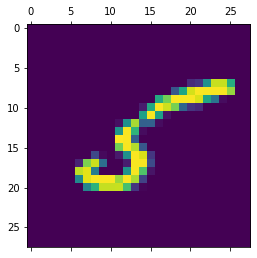

In [48]:
plt.matshow(xtrain[11])

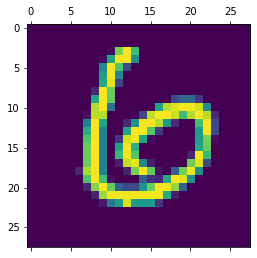

In [50]:
plt.matshow(xtest[11])

In [51]:
# normalization 
xtest=xtest/255
xtrain=xtrain/25

In [52]:
xtrain[11].shape

(28, 28)

In [53]:
#flatten the image into 28*28 to 784 
#making it single dimention for simplicity of work
xtrain=xtrain.reshape(-1,784)
xtest=xtest.reshape(-1,784)

In [54]:
xtrain[11].shape

(784,)

In [55]:
#Building the model
#sequencial
# 3 layers, first 2 layers 64 neuron and relu function
#output layer 10 neuron and softmax fucntion
model= keras.Sequential()
model.add(Dense(64, activation='relu', input_dim=784)) # input layer
model.add(Dense(64, activation='relu')) # hidden layer
model.add(Dense(10, activation='softmax')) # output layer

In [56]:
#compiling model by calculating loss
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [57]:
#training model
model.fit(xtrain, 
          to_categorical(ytrain),
          epochs=10,
          batch_size=32,
          )

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.5006 - accuracy: 0.8550
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1346 - accuracy: 0.9593
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1010 - accuracy: 0.9692
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0809 - accuracy: 0.9748
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0657 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0589 - accuracy: 0.9809
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0492 - accuracy: 0.9841
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0441 - accuracy: 0.9857
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0431 - accuracy: 0.9855
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.038

In [58]:
#Evaluate the model
model.evaluate(
    xtest,
    to_categorical(ytest)
)

313/313 [==============================] - 0s 1ms/step - loss: 0.8345 - accuracy: 0.9303


[0.8344587087631226, 0.9302999973297119]

In [60]:
pred= model.predict(xtest)

In [61]:
pred

array([[0.02320703, 0.05809578, 0.09799735, ..., 0.29625157, 0.13627243,
        0.09245825],
       [0.05092085, 0.04768267, 0.7008147 , ..., 0.00797564, 0.06386319,
        0.01658441],
       [0.04741012, 0.3567123 , 0.05703495, ..., 0.05351843, 0.11900658,
        0.07984125],
       ...,
       [0.00338448, 0.01579794, 0.01899142, ..., 0.01465758, 0.04613418,
        0.07289957],
       [0.00168131, 0.00400662, 0.00395583, ..., 0.00253134, 0.05372567,
        0.01743879],
       [0.01234772, 0.00667445, 0.0268076 , ..., 0.0015069 , 0.05197873,
        0.0104271 ]], dtype=float32)

In [62]:
np.argmax(pred[11])

6

In [63]:
y_pred= model.predict(xtest)
ypred= [np.argmax(i) for i in y_pred]
confusion_matrix= tf.math.confusion_matrix(labels=ytest, predictions=ypred)

Text(69.0, 0.5, 'Truth values or expected one')

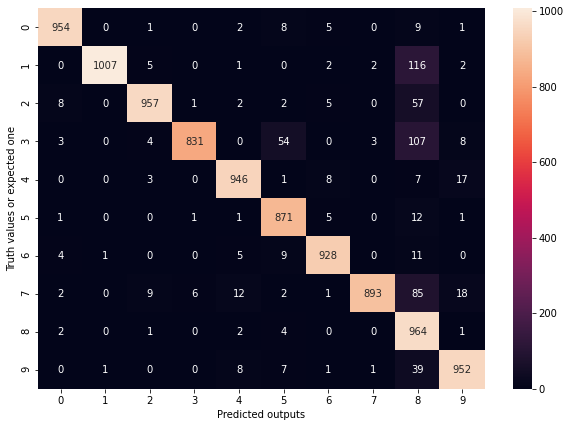

In [64]:
plt.figure(figsize=(10,7))
seaborn.heatmap(confusion_matrix, annot=True, fmt='d')
plt.xlabel('Predicted outputs')
plt.ylabel('Truth values or expected one')